# CNNs - CLASSIFICAÇÃO DE DÍGITOS COM MNIST

OBJETIVO: Criar e treinar uma Rede Neural Convolucional (CNN) para classificação de dígitos utilizando a biblioteca MNIST.

In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
x_treino.shape

(60000, 28, 28)

In [3]:
x_teste.shape

(10000, 28, 28)

In [4]:
#One hot encoding:
from keras.utils import to_categorical
y_treino = to_categorical(y_treino)
y_teste = to_categorical(y_teste)

In [5]:
#No modelo Conv2d preciso passar 3 dimensões na entrada: para altura, largura e padrão de cores.
x_treino = x_treino.reshape(60000, 28, 28, 1)  #(tamanho, largura, altura e padrão de cores). 1= escala de cinza
x_teste = x_teste.reshape(10000, 28, 28, 1)    #(tamanho, largura, altura e padrão de cores). 1 = escala de cinza

In [6]:
#Importando bibliotecas:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D  

In [7]:
#Criando a CNN(híbrida):
modelo = Sequential()

modelo.add(Conv2D(filters=32, kernel_size=5, activation='relu', input_shape=(28,28,1))) #Filters: nº de filtros, kernel_size=dimensão dos filtros(5 = 5x5)
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same')) #padding='valid' (desativado), padding='same'(ativado)
modelo.add(Conv2D(filters=32, kernel_size=5, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
modelo.add(Flatten())
modelo.add(Dense(80, kernel_initializer='normal', activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(10, kernel_initializer='normal', activation='softmax'))

In [8]:
#Compilando o modelo com otimizador e função de custo:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) #categorigcal_crossentropy: entropia cruzada

In [9]:
#Aplicando modelo para treino:
testes = modelo.fit(x_treino, y_treino, batch_size=200, epochs=10, validation_data=(x_teste, y_teste), verbose=1)

Epoch 1/10
300/300 [==============================] - 43s 142ms/step - loss: 1.5618 - accuracy: 0.7434 - val_loss: 0.0739 - val_accuracy: 0.9764
Epoch 2/10
300/300 [==============================] - 42s 141ms/step - loss: 0.0921 - accuracy: 0.9719 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 3/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 4/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0440 - accuracy: 0.9855 - val_loss: 0.0411 - val_accuracy: 0.9876
Epoch 5/10
300/300 [==============================] - 42s 139ms/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0376 - val_accuracy: 0.9879
Epoch 6/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0362 - val_accuracy: 0.9888
Epoch 7/10
300/300 [==============================] - 42s 140ms/step - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0347 - val_ac

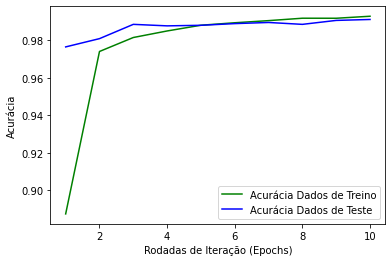

In [10]:
#Comparando acurácia dos dados de treino e dos dados de teste:
import matplotlib.pyplot as plt

acuracia_treino = testes.history['accuracy']
acuracia_teste = testes.history['val_accuracy']

epochs = range(1,len(acuracia_treino)+1) #Começa-se com 1 ao invés de 0 e soma-se mais 1 ja que em python o range vai de 0 a 39.

plt.plot(epochs, acuracia_treino, '-g', label='Acurácia Dados de Treino')   #-g: green/marcador ., -b: blue/marcador -
plt.plot(epochs, acuracia_teste, '-b', label='Acurácia Dados de Teste')
plt.legend()
plt.xlabel('Rodadas de Iteração (Epochs)')
plt.ylabel('Acurácia')
plt.show()